In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df =pd.read_csv("games.csv")

In [4]:
print("Shape of Dataset: ",df.shape)
print("Columns for the Dataset: ",df.columns)

Shape of Dataset:  (81312, 20)
Columns for the Dataset:  Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [5]:
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


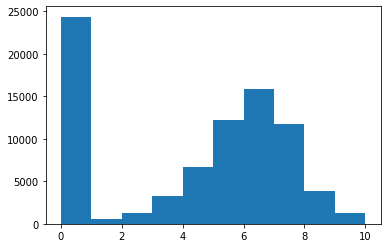

In [6]:
plt.hist(df["average_rating"])
plt.show()

Text(0.5, 1.0, 'Distribution of Weights')

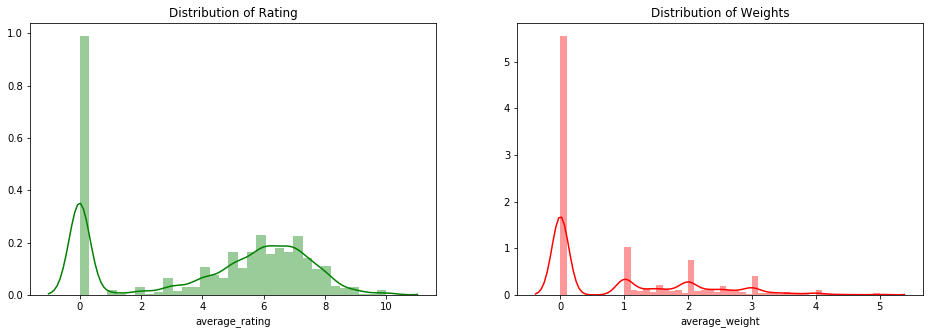

In [11]:
fig,ax=plt.subplots(1,2,figsize=(16,5))

rat=df["average_rating"]
wgt=df["average_weight"]

sns.distplot(rat,ax=ax[0],color='g')
ax[0].set_title("Distribution of Rating")

sns.distplot(wgt,ax=ax[1],color='r')
ax[1].set_title("Distribution of Weights")

Text(0.5, 0, 'Average Weights')

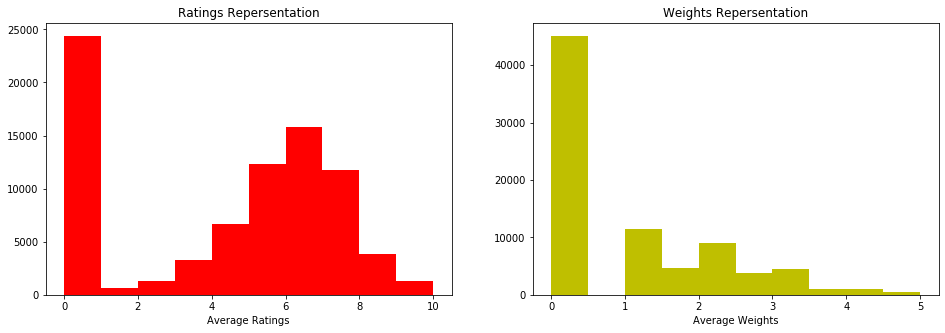

In [19]:
# Histogram Representation
fig,ax=plt.subplots(1,2,figsize=(16,5))

rat=df["average_rating"]
wgt=df["average_weight"]

ax[0].hist(rat,color='r')
ax[0].set_title("Ratings Repersentation")
ax[0].set_xlabel("Average Ratings")


ax[1].hist(wgt,color='y')
ax[1].set_title("Weights Repersentation")
ax[1].set_xlabel("Average Weights")

In [24]:
#Checking Dataset for 0 average ratings 
df[df["average_rating"]==0]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0
13127,962,boardgame,Contango,2000.0,2.0,6.0,90.0,90.0,90.0,10.0,0,0.0,0.0,0,0,0,2,1,0,0.0
13169,1097,boardgame,Don't Give Up Your Day Job!,2000.0,6.0,41.0,120.0,120.0,120.0,8.0,0,0.0,0.0,0,0,0,2,0,0,0.0
13180,1151,boardgame,"Money, Power, Respect",2000.0,2.0,6.0,90.0,90.0,90.0,8.0,0,0.0,0.0,1,0,0,2,0,0,0.0
13181,1154,boardgame,Nuts! To You,1987.0,2.0,2.0,20.0,20.0,20.0,6.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13188,1180,boardgame,Tower of Babylon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,5,0,2,2,0,0,0.0


In [25]:
#Checking Dataset for 0 average weights
df[df["average_weight"]==0]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
6164,18529,boardgame,Penguin Encyclopedia of Card Games,1979.0,2.0,0.0,5.0,5.0,5.0,12.0,32,8.62500,5.63629,65,2,1,14,24,0,0.0
6386,114800,boardgame,Rune Wars,2012.0,2.0,2.0,40.0,40.0,40.0,12.0,45,7.59333,5.62445,157,3,10,37,3,0,0.0
6636,7159,boardgame,The Boardgame Book,1979.0,0.0,0.0,0.0,0.0,0.0,8.0,40,7.55500,5.61246,105,8,6,12,37,0,0.0
7508,34450,boardgame,Bluff,1973.0,2.0,6.0,30.0,30.0,30.0,0.0,50,6.79600,5.58006,116,5,0,10,13,0,0.0
8159,150323,boardgame,Berserk: Knights and Villains,2013.0,2.0,2.0,60.0,40.0,60.0,13.0,38,6.64868,5.56168,160,11,4,5,14,0,0.0
8290,27373,boardgame,Guillotine,1987.0,2.0,4.0,90.0,90.0,90.0,10.0,54,6.46759,5.55870,116,2,0,4,7,0,0.0
8402,226,boardgame,Isi,1999.0,2.0,2.0,30.0,30.0,30.0,12.0,38,6.53289,5.55546,67,5,12,12,18,0,0.0
8468,39530,boardgame,Element,2008.0,2.0,2.0,30.0,30.0,30.0,9.0,33,6.72461,5.55403,71,4,1,14,19,0,0.0
8866,3102,boardgame,Banque Fatale,1997.0,3.0,4.0,45.0,45.0,45.0,10.0,77,5.92987,5.54433,101,9,4,7,25,0,0.0
8908,97469,boardgame,Blokus Junior,0.0,2.0,0.0,15.0,15.0,15.0,5.0,32,6.55000,5.54308,84,3,4,8,17,0,0.0


In [36]:
# Removing Datasets with 0 user ratings as might be unreleased
games = df[df["users_rated"]>0]

games.dropna(axis=0,inplace=True)

print("Shape of Dataset :",games.shape)

Shape of Dataset : (56894, 20)


C:\Users\Dipto\Anaconda33\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
games.isnull().sum()

id                      0
type                    0
name                    0
yearpublished           0
minplayers              0
maxplayers              0
playingtime             0
minplaytime             0
maxplaytime             0
minage                  0
users_rated             0
average_rating          0
bayes_average_rating    0
total_owners            0
total_traders           0
total_wanters           0
total_wishers           0
total_comments          0
total_weights           0
average_weight          0
dtype: int64

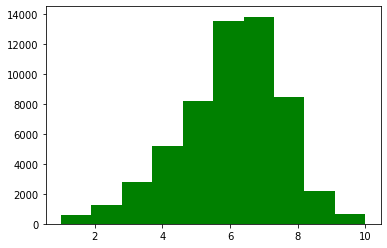

In [38]:
#Check Updated Dataset
plt.hist(games["average_rating"],color='g')
plt.show()

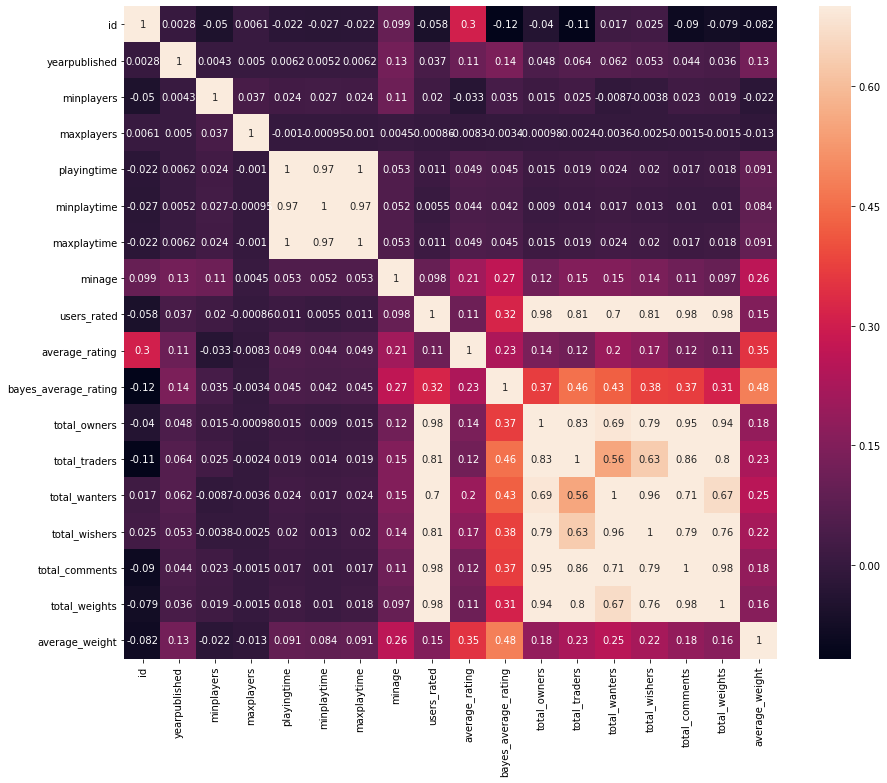

In [40]:
# Checking Correlations

corr_mat=games.corr()
fig=plt.figure(figsize=(15,12))

sns.heatmap(corr_mat,vmax=0.7,square=True,annot=True,cbar=True)

In [42]:
games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [ ]:
columns=list(games.columns)

#FIlter Columns
columns=[c for c in columns if c not in ["id",'bayes_average_rating','name','type']]
